In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sr
import sklearn.neighbors as sk
import random

%matplotlib notebook
%matplotlib inline

In [2]:
# import data
data = pd.read_csv(r'D:\8th Sem\AI for Engieers\clean_trainData.csv')
test = pd.read_csv(r'D:\8th Sem\AI for Engieers\clean_testData.csv')


In [6]:
data

,b1,b2,b3,b4,soil_type
0,84,99,104,78,3
1,84,99,104,81,3
2,76,99,104,81,3
3,76,99,108,85,3
4,80,112,118,88,3
...,...,...,...,...,...
3961,59,75,89,75,5
3962,59,79,89,71,5
3963,75,99,104,83,4
3964,75,95,100,79,4


In [3]:
# for cisualization Purpose
b1 = np.arange(start = 25, stop = 160, step=1)
b2 = np.arange(start = 25, stop = 160, step=1)

xx, yy = np.meshgrid(b1,b2)

cdf = pd.DataFrame({'b1': xx.reshape(-1),
                   'b2': yy.reshape(-1)})

cdf_arr = np.array(cdf)

In [4]:
# For Visualization Purpose selecting only 2 bands
train_bands = np.array(data[['b1', 'b3']])
test_bands = np.array(test[['b1','b3']])

train_yy = np.array(data[['soil_type']])
test_yy = np.array(test[['soil_type']])

# KNN Classifier

In [5]:
import sklearn.neighbors as sk
train_bands = np.array(data[['b3', 'b4']])
test_bands = np.array(test[['b3','b4']])

train_yy = np.array(data[['soil_type']])
test_yy = np.array(test[['soil_type']])

knn = sk.KNeighborsClassifier(n_neighbors=50)
knn.fit(train_bands, train_yy.ravel())

KNeighborsClassifier(n_neighbors=50)

In [6]:
knn.score(test_bands, test_yy, sample_weight=None)

0.7029867256637168

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'KKN Visualization')

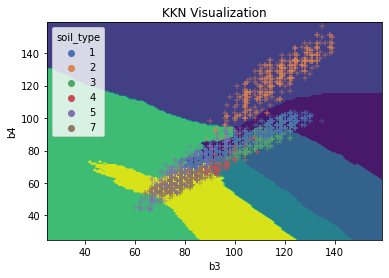

In [7]:
knnz = knn.predict(cdf_arr)
cdf['predict'] = knnz

plt.contourf(xx, yy, knnz.reshape(xx.shape))
sr.scatterplot(data.b3, data.b4, hue=data.soil_type, palette="deep", marker='+')
plt.title("KKN Visualization")


# Nearest Centroid

In [8]:
nc = sk.NearestCentroid()

train_bands = np.array(data[['b1', 'b3']])
test_bands = np.array(test[['b1','b3']])

train_yy = np.array(data[['soil_type']])
test_yy = np.array(test[['soil_type']])

nc.fit(train_bands, train_yy.ravel())
y2 = nc.predict(test_bands)
nc.score(test_bands, test_yy)

0.8241150442477876

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nearest Centroid')

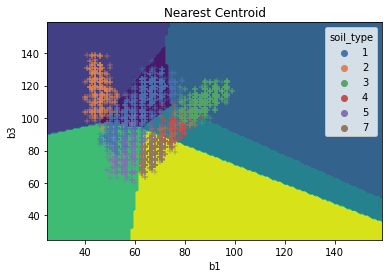

In [9]:
z = nc.predict(cdf_arr)
cdf['predict'] = z

plt.contourf(xx, yy, z.reshape(xx.shape))
sr.scatterplot(data.b1, data.b3, hue=data.soil_type, palette="deep", marker='+')
plt.title("Nearest Centroid")

# Decision Trees

In [10]:
import sklearn.tree as stree

train_bands = np.array(data[['b1', 'b3']])
test_bands = np.array(test[['b1','b3']])

train_yy = np.array(data[['soil_type']])
test_yy = np.array(test[['soil_type']])

clf = stree.DecisionTreeClassifier(random_state=3, max_depth=5)
clf = clf.fit(train_bands, train_yy.ravel())
z3 = clf.predict(test_bands)


In [11]:
clf.score(test_bands, test_yy)

0.8561946902654868

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='b1', ylabel='b3'>

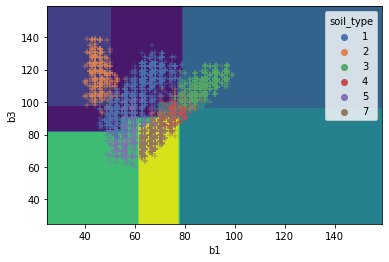

In [12]:
z3 = clf.predict(cdf_arr)
cdf['predict'] = z3

plt.contourf(xx, yy, z3.reshape(xx.shape))
sr.scatterplot(data.b1, data.b3, hue=data.soil_type, palette="deep", marker='+')

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

train_bands = np.array(data[['b1', 'b3']])
test_bands = np.array(test[['b1','b3']])

train_yy = np.array(data[['soil_type']])
test_yy = np.array(test[['soil_type']])

clf2 = clf = RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_split=20, random_state=1)
clf2 = clf2.fit(train_bands, train_yy.ravel())

In [14]:
clf2.score(test_bands, test_yy)

0.8523230088495575

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='b1', ylabel='b3'>

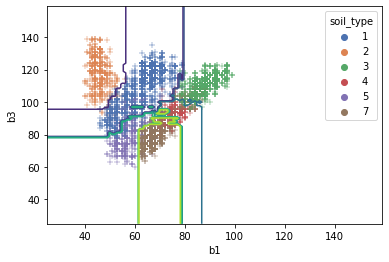

In [15]:
z5= clf.predict(cdf_arr)
cdf['predict'] = z5

plt.contour(xx, yy, z5.reshape(xx.shape))
sr.scatterplot(data.b1, data.b3, hue=data.soil_type, palette="deep", marker='+')

# Neural Network 

In [16]:
from sklearn.neural_network import MLPClassifier

train_bands = np.array(data[['b1', 'b3']])
test_bands = np.array(test[['b1','b3']])

train_yy = np.array(data[['soil_type']])
test_yy = np.array(test[['soil_type']])

clf_neural = MLPClassifier(solver='adam',activation='tanh', alpha=0.001, max_iter=9000,
                           hidden_layer_sizes=(5,4),learning_rate='adaptive', random_state=45)

clf_neural.fit(train_bands, train_yy.ravel())


MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(5, 4),
              learning_rate='adaptive', max_iter=9000, random_state=45)

In [17]:
clf_neural.score(train_bands, train_yy.ravel())
clf_neural.score(test_bands, test_yy.ravel())

0.8418141592920354

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ANN based Classification - tanh + adam')

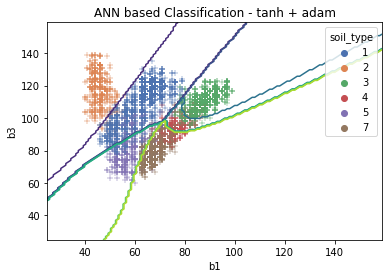

In [18]:
z_neural= clf_neural.predict(cdf_arr)
cdf['predict'] = z_neural

plt.contour(xx, yy, z_neural.reshape(xx.shape), linestyles='solid')
sr.scatterplot(data.b1, data.b3, hue=data.soil_type, palette="deep", marker='+')
plt.title("ANN based Classification - tanh + adam")